# Project Assignment 3

Please note that project 3 is **assignment week 9 plus a few additional questions.** For your convenience, you can see the exact same questions as in assignment week 9 first. The extra questions are starting from Q20.

## Minimum Spanning Tree

Start with all the assets available in the Investment Funnel for the entire period. Divide this period into half, where the first half is used for training and the second half for testing.

**Q1: Now calculate the Sharpe Ratio for all the assets for the first half (the training set).**

In [9]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

In [10]:
data = pd.read_parquet("algostrata_name.parquet")
data

,Alm. Brand Invest Mix ETIK,Alm. Brand Invest Mix Offensiv ETIK,Alm. Brand Invest Korte Obligation ETIK,Alm. Brand Invest Europæiske Aktier ETIK,Alm. Brand Invest Globale Aktier ETIK,Wealth Invest Amalie Global AK,Alm. Brand Invest Nordiske Aktier ETIK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,...,iShares STOXX Eurp 600 P & H Goods (DE),iShares Core MSCI Pac ex-Jpn ETF USD Acc,iShares MSCI ACWI ETF USD Acc,iShares Core S&P 500 ETF USD Acc,iShares S&P 500 EUR Hedged ETF Acc,iShares MSCI Japan Small Cap ETF USD Dis,Xtrackers S&P Global Infras Swap ETF 1C,Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
2012-01-11 00:00:00+00:00,0.015134,0.006069,0.000887,0.005416,0.021335,0.016686,0.030303,0.024658,-0.000281,-0.000458,...,-0.000654,0.015346,0.020060,0.029827,0.012299,0.004881,0.006464,0.004637,0.003364,0.003310
2012-01-18 00:00:00+00:00,0.006833,0.008828,0.000000,0.012080,0.001885,0.005471,0.022186,0.008594,0.001265,0.000763,...,0.012985,0.009096,0.006481,0.001870,0.010046,-0.008594,0.001089,0.006495,0.003850,0.000941
2012-01-25 00:00:00+00:00,0.002644,0.011814,-0.000197,0.005323,0.006741,0.006696,0.004281,-0.009657,0.007438,0.007471,...,0.000486,0.015004,0.004967,0.001372,0.009221,0.000421,-0.008601,-0.008965,0.004883,0.001401
2012-02-01 00:00:00+00:00,0.009142,0.014703,0.000984,0.013798,0.000156,-0.007068,0.021315,0.024092,0.011283,0.010670,...,0.028292,-0.003084,-0.003798,-0.018339,0.008531,0.009153,0.016737,0.015042,0.008338,0.002710
2012-02-08 00:00:00+00:00,0.016551,0.013140,-0.001180,0.022472,0.016815,0.014096,0.035624,0.024832,0.003030,0.003220,...,0.003624,0.018755,0.015051,0.015560,0.013891,0.002510,0.002792,-0.002704,0.001531,-0.000444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 00:00:00+00:00,0.008200,0.010055,0.002220,0.007042,0.011084,0.007505,0.012492,0.013210,-0.003161,-0.002912,...,0.095841,-0.006625,0.004624,0.008643,0.009470,0.013330,0.017415,0.013387,0.002683,0.123474
2021-08-04 00:00:00+00:00,0.009919,0.011801,0.000805,0.020820,0.006421,0.007319,0.019431,0.018688,0.004932,0.004726,...,0.015448,0.019202,0.004214,-0.003437,0.000196,-0.004500,-0.005617,0.004267,0.001629,0.001653
2021-08-11 00:00:00+00:00,0.005827,0.008737,-0.000704,0.016114,0.016494,0.011417,0.004502,0.003626,-0.002629,-0.002590,...,0.004291,0.014155,0.015811,0.019757,0.010477,0.010897,0.016828,-0.001805,-0.001516,-0.000114
2021-08-18 00:00:00+00:00,-0.001953,-0.002439,-0.000705,-0.004826,-0.001760,-0.001732,-0.005180,0.018278,0.003163,0.003232,...,-0.029450,-0.015973,-0.009238,-0.007911,-0.010515,-0.006163,-0.001863,0.000137,0.000529,0.000136


In [11]:
training_set = data[0:252]
test_set = data[252:504]

training_set

,Alm. Brand Invest Mix ETIK,Alm. Brand Invest Mix Offensiv ETIK,Alm. Brand Invest Korte Obligation ETIK,Alm. Brand Invest Europæiske Aktier ETIK,Alm. Brand Invest Globale Aktier ETIK,Wealth Invest Amalie Global AK,Alm. Brand Invest Nordiske Aktier ETIK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,...,iShares STOXX Eurp 600 P & H Goods (DE),iShares Core MSCI Pac ex-Jpn ETF USD Acc,iShares MSCI ACWI ETF USD Acc,iShares Core S&P 500 ETF USD Acc,iShares S&P 500 EUR Hedged ETF Acc,iShares MSCI Japan Small Cap ETF USD Dis,Xtrackers S&P Global Infras Swap ETF 1C,Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
2012-01-11 00:00:00+00:00,0.015134,0.006069,0.000887,0.005416,0.021335,0.016686,0.030303,0.024658,-0.000281,-0.000458,...,-0.000654,0.015346,0.020060,0.029827,0.012299,0.004881,0.006464,0.004637,0.003364,0.003310
2012-01-18 00:00:00+00:00,0.006833,0.008828,0.000000,0.012080,0.001885,0.005471,0.022186,0.008594,0.001265,0.000763,...,0.012985,0.009096,0.006481,0.001870,0.010046,-0.008594,0.001089,0.006495,0.003850,0.000941
2012-01-25 00:00:00+00:00,0.002644,0.011814,-0.000197,0.005323,0.006741,0.006696,0.004281,-0.009657,0.007438,0.007471,...,0.000486,0.015004,0.004967,0.001372,0.009221,0.000421,-0.008601,-0.008965,0.004883,0.001401
2012-02-01 00:00:00+00:00,0.009142,0.014703,0.000984,0.013798,0.000156,-0.007068,0.021315,0.024092,0.011283,0.010670,...,0.028292,-0.003084,-0.003798,-0.018339,0.008531,0.009153,0.016737,0.015042,0.008338,0.002710
2012-02-08 00:00:00+00:00,0.016551,0.013140,-0.001180,0.022472,0.016815,0.014096,0.035624,0.024832,0.003030,0.003220,...,0.003624,0.018755,0.015051,0.015560,0.013891,0.002510,0.002792,-0.002704,0.001531,-0.000444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.005238,0.009741,-0.001375,0.011611,0.007282,-0.003434,0.008773,-0.001885,0.000876,0.000176,...,-0.012725,0.000128,-0.004253,-0.007124,0.001779,-0.018502,-0.021069,-0.005282,-0.005578,-0.006585
2016-10-12 00:00:00+00:00,-0.001924,-0.002260,-0.002261,-0.019389,0.005553,0.000957,-0.015199,-0.015210,-0.004815,-0.005469,...,-0.011461,0.009788,0.001776,0.007156,-0.010288,0.004898,-0.003882,-0.007523,-0.002473,-0.001269
2016-10-19 00:00:00+00:00,0.004418,0.005028,0.000296,0.009091,0.008544,0.009660,0.011061,0.024732,-0.001173,-0.001005,...,0.002043,0.010967,0.011719,0.007032,0.002616,0.032080,0.027321,0.002390,0.001765,0.001200
2016-10-26 00:00:00+00:00,-0.001839,-0.001704,-0.001084,-0.004617,-0.003099,-0.003884,-0.009159,-0.009753,0.002642,0.002723,...,-0.013298,-0.004321,0.000688,0.001987,-0.000821,0.007334,0.000792,0.000721,-0.002561,-0.002748


In [12]:
from scipy.stats.mstats import gmean

def average_return(return_list):
    return_list = [x+1 for x in return_list]
    
    return gmean(return_list)-1

def annualize_weekly(avg_return_weekly):
    return (1+avg_return_weekly)**52-1

In [13]:
# both annualized

average_returns = [annualize_weekly(average_return(training_set[asset])) for asset in training_set]
stds = [np.std(training_set[asset])*np.sqrt(52) for asset in training_set]

In [14]:
asset_info = [list(asset_info) for asset_info in zip(average_returns, stds)]

info_df = pd.DataFrame(asset_info).T
info_df.columns = training_set.columns
info_df.index = ["Average return", "Standard deviation"]


In [15]:
def calculate_sharpe(expected_return, expected_std, risk_free_return=0):
    return (expected_return-risk_free_return)/expected_std

In [16]:
# info_df[asset][0] = avg return
# info_df[asset][1] = std

sharpe_ratio_list = [calculate_sharpe(info_df[asset][0], info_df[asset][1]) 
               for asset in info_df]

In [17]:
asset_info = [list(asset_info) for asset_info in zip(average_returns, stds, sharpe_ratio_list)]

info_df = pd.DataFrame(asset_info).T
info_df.columns = training_set.columns
info_df.index = ["Average return", "Standard deviation", "Sharpe Ratio"]


info_df

,Alm. Brand Invest Mix ETIK,Alm. Brand Invest Mix Offensiv ETIK,Alm. Brand Invest Korte Obligation ETIK,Alm. Brand Invest Europæiske Aktier ETIK,Alm. Brand Invest Globale Aktier ETIK,Wealth Invest Amalie Global AK,Alm. Brand Invest Nordiske Aktier ETIK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,...,iShares STOXX Eurp 600 P & H Goods (DE),iShares Core MSCI Pac ex-Jpn ETF USD Acc,iShares MSCI ACWI ETF USD Acc,iShares Core S&P 500 ETF USD Acc,iShares S&P 500 EUR Hedged ETF Acc,iShares MSCI Japan Small Cap ETF USD Dis,Xtrackers S&P Global Infras Swap ETF 1C,Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
Average return,0.068270,0.082255,0.007940,0.080222,0.093897,0.107244,0.089547,0.205494,0.052065,0.052781,...,0.142190,0.076280,0.114499,0.161953,0.117095,0.136136,0.096184,0.039928,0.039510,0.025116
Standard deviation,0.103757,0.134344,0.009345,0.167568,0.157299,0.137764,0.177673,0.151370,0.050752,0.052085,...,0.163539,0.170933,0.140509,0.143295,0.121847,0.166786,0.137877,0.052775,0.020613,0.014157
Sharpe Ratio,0.657981,0.612275,0.849620,0.478739,0.596929,0.778467,0.504000,1.357565,1.025868,1.013361,...,0.869455,0.446255,0.814887,1.130206,0.961000,0.816232,0.697605,0.756566,1.916716,1.774083


In [18]:
info_df_train = info_df.T

In [19]:
info_df_train

,Average return,Standard deviation,Sharpe Ratio
Alm. Brand Invest Mix ETIK,0.068270,0.103757,0.657981
Alm. Brand Invest Mix Offensiv ETIK,0.082255,0.134344,0.612275
Alm. Brand Invest Korte Obligation ETIK,0.007940,0.009345,0.849620
Alm. Brand Invest Europæiske Aktier ETIK,0.080222,0.167568,0.478739
Alm. Brand Invest Globale Aktier ETIK,0.093897,0.157299,0.596929
...,...,...,...
iShares MSCI Japan Small Cap ETF USD Dis,0.136136,0.166786,0.816232
Xtrackers S&P Global Infras Swap ETF 1C,0.096184,0.137877,0.697605
Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,0.039928,0.052775,0.756566
Xtrackers II EUR Corporate Bond ETF 1C,0.039510,0.020613,1.916716


### Strategy 1

**Q2: Pick up the top 4-5 assets with the highest Sharpe Ratios for the training set.**

In [20]:
info_df_train['Sharpe Ratio'].nlargest(n=5)

Nordea Invest Euro High Yield Bonds KL    2.693375
Nykredit Invest Engros EuroKredit         2.671643
Maj Invest Danske Obligationer            2.670823
Nykredit Invest Bæredygtige Kreditobli    2.529313
Nordea Invest Engros Corporate Bonds      2.436202
Name: Sharpe Ratio, dtype: float64

**Q3: Calculate the covariance matrix for these assets.**

In [21]:
top_5 =  training_set[['Nordea Invest Euro High Yield Bonds KL',
                       'Nykredit Invest Engros EuroKredit',
                       'Maj Invest Danske Obligationer', 
                       'Nykredit Invest Bæredygtige Kreditobli', 
                       'Nordea Invest Engros Corporate Bonds']]

top_5.cov()

,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Maj Invest Danske Obligationer,Nykredit Invest Bæredygtige Kreditobli,Nordea Invest Engros Corporate Bonds
Nordea Invest Euro High Yield Bonds KL,0.000028,0.000011,0.000002,0.000010,0.000011
Nykredit Invest Engros EuroKredit,0.000011,0.000013,0.000004,0.000012,0.000011
Maj Invest Danske Obligationer,0.000002,0.000004,0.000004,0.000004,0.000004
Nykredit Invest Bæredygtige Kreditobli,0.000010,0.000012,0.000004,0.000011,0.000010
Nordea Invest Engros Corporate Bonds,0.000011,0.000011,0.000004,0.000010,0.000012


**Q4: Make an equal weight portfolio of these assets and test their performance on your testing data now.**

In [22]:
training_sum_1 = 0

for asset in top_5.columns:
    training_sum_1 += (1/5)* info_df_train.at[asset, "Average return"]
    
print("The return for equal weight portfolio for the TRAINING SET is", training_sum_1)

The return for equal weight portfolio for the TRAINING SET is 0.06657458287073595


In [23]:
# both annualized

average_returns = [annualize_weekly(average_return(test_set[asset])) for asset in test_set]
stds = [np.std(test_set[asset])*np.sqrt(52) for asset in test_set]

asset_info = [list(asset_info) for asset_info in zip(average_returns, stds)]

info_df_test = pd.DataFrame(asset_info).T
info_df_test.columns = test_set.columns
info_df_test.index = ["Average return", "Standard deviation"]

In [24]:
info_df_test = info_df_test.T
info_df_test

,Average return,Standard deviation
Alm. Brand Invest Mix ETIK,0.097738,0.093926
Alm. Brand Invest Mix Offensiv ETIK,0.124429,0.121906
Alm. Brand Invest Korte Obligation ETIK,0.002938,0.014983
Alm. Brand Invest Europæiske Aktier ETIK,0.089712,0.170582
Alm. Brand Invest Globale Aktier ETIK,0.147312,0.147772
...,...,...
iShares MSCI Japan Small Cap ETF USD Dis,0.057505,0.145777
Xtrackers S&P Global Infras Swap ETF 1C,0.047886,0.165278
Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,0.026413,0.066724
Xtrackers II EUR Corporate Bond ETF 1C,0.018921,0.036140


In [25]:
test_sum_1 = 0

for asset in top_5.columns:
    test_sum_1 += (1/5)* info_df_test.at[asset, "Average return"]
    
print("The return for equal weight portfolio for the TEST SET is", test_sum_1)

The return for equal weight portfolio for the TEST SET is 0.02326011335706331


## Strategy 2

**Q5: Pick up the top 200 assets with the highest Sharpe Ratios for the training set.**

In [26]:
top_200 = info_df_train['Sharpe Ratio'].nlargest(n=200)

list(top_200.index)

['Nordea Invest Euro High Yield Bonds KL',
 'Nykredit Invest Engros EuroKredit',
 'Maj Invest Danske Obligationer',
 'Nykredit Invest Bæredygtige Kreditobli',
 'Nordea Invest Engros Corporate Bonds',
 'BankInvest Korte Danske Obligationer A',
 'BankInvest Korte Danske Obligationer W',
 'Danske Invest Gl VO KL DKK W d h',
 'Danske Invest Glbl Virk.obl Kl DKK d h',
 'Danske Invest Euro IG Obl KL DKK Wdh',
 'Danske Inv Euro IG Obl KL DKK d h',
 'Gudme Raaschou European High Yield',
 'Danske Invest Kommuner 4 KL',
 'Nordea Invest Korte Obli. Lagerbe KL',
 'SEBinvest AKL Kreditobl (euro) SRI P',
 'SEBinvest AKL Kreditobl (euro) SRI I',
 'Jyske Invest Højt Ratede Vrk.obl KL',
 'Danske Inv Euro IG CB Rst DKK Wd',
 'Danske Inv EuroIG CorpBds Re KL DKKd',
 'BankInvest Virksomhedsobl IG Akk A',
 'BankInvest Virksomhedsobl IG Akk W',
 'BankInvest Virksomhedsobligationer IG W',
 'BankInvest Virksomhedsobligationer IG A',
 'Fundamental Invest Stock Pick',
 'Nykredit Invest Korte Obligationer Akk',


**Q6: Run the Minimum Spanning Tree method on this set a number of times until you have only about 4-5 assets left.**

In [27]:
import pandas as pd
import numpy as np
import networkx as nx

from sklearn.decomposition import PCA


def MinimumSpanningTree(dataset):
    corr = dataset.corr(method="spearman")              # calculate the correlation
    distance_corr = (2*(1-corr))**0.5                   # calculate the distance
    mask = np.triu(np.ones_like(corr, dtype=np.bool))   # get only the upper half of the matrix
    distance_corr = distance_corr*mask 
   
    # use the correlation matrix to create links
    links = distance_corr.stack().reset_index(level=1)
    links.columns = ["var2","value"]
    links = links.reset_index()
    links = links.replace(0, np.nan)                                # drop 0 values from the matrix
    links = links.dropna(how='any', axis=0)
    links.columns = ["var1", "var2", "value"]                       # rename the columns
    links_filtered = links.loc[(links["var1"] != links["var2"])]    # filter out self-correlations
    
    # Create the graph
    G = nx.Graph() 
    for i in range(len(corr)):                                          # add nodes
        G.add_node(corr.index[i])
    tuples = list(links_filtered.itertuples(index=False, name=None))    # add edges with weight
    G.add_weighted_edges_from(tuples)
    
    # Create a MST from the full graph
    mst = nx.minimum_spanning_tree(G)
    
    # Save the nodes with degree one
    degrees = [val for (node, val) in mst.degree()]
    df = pd.DataFrame(degrees, corr.index)
    df.columns = ["degree"]
    subset = df[df["degree"] == 1].index.tolist()

    # Create a new dataframe with only the assets from the subset
    subset_df = dataset.loc[:, dataset.columns.isin(subset)]
    
    # Calculate the average correlation of the subset
    corr_subset = subset_df.corr(method="spearman")
    corr_avg=corr_subset.mean().mean()
    
    # Calculate the PDI for the subset
    pca = PCA()
    pca.fit(corr_subset)
    value = 0
    for i in range(1, corr_subset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    PDI = 2*value - 1

    return subset, subset_df, corr_avg, PDI

In [28]:
# METHOD TO PLOT THE OVERVIEW OF THE FINANCIAL PRODUCTS IN TERMS OF RISK AND RETURNS
def plot_dots(self, start, end, ML=None, MLsubset=None, fundSet=[]):
    # Get statistics for a given time period
    data = self.__get_stat(start, end)

    # IF WE WANT TO HIGHLIGHT THE SUBSET OF ASSETS BASED ON ML
    if ML == "MST":
        data.loc[:, "Type"] = "Funds"
        for fund in MLsubset:
            data.loc[fund, "Type"] = "MST subset"
    if ML == "Clustering":
        data.loc[:, "Type"] = MLsubset.loc[:, "Cluster"]

    # If selected any fund for comparison
    for fund in fundSet:
        isin_idx = list(self.names).index(fund)
        data.loc[self.tickers[isin_idx], "Type"] = str(data.loc[self.tickers[isin_idx], "Name"])
        data.loc[self.tickers[isin_idx], "Size"] = 3

    # PLOTTING Data
    color_discrete_map = {'Mutual Fund': '#21304f', 'ETF': '#f58f02',
                          'Funds': '#21304f', "MST subset": '#f58f02',
                          'Cluster 1': '#21304f', 'Cluster 2': '#f58f02'}
    fig = px.scatter(data,
                     x="Standard Deviation of Returns",
                     y="Average Annual Returns",
                     color="Type",
                     size="Size",
                     size_max=8,
                     hover_name="Name",
                     hover_data={"Sharpe Ratio": True, "ISIN": True, "Size": False},
                     color_discrete_map=color_discrete_map,
                     title="Annual Returns and Standard Deviation of Returns from "
                           + start[:10] + " to " + end[:10]
                    )

    # AXIS IN PERCENTAGES
    fig.layout.yaxis.tickformat = ',.1%'
    fig.layout.xaxis.tickformat = ',.1%'

    # RISK LEVEL MARKER
    minRisk = data['Standard Deviation of Returns'].min()
    maxRisk = data['Standard Deviation of Returns'].max()
    riskLevels = {"Risk Class 1" : 0.005, 
                  "Risk Class 2" : 0.02, 
                  "Risk Class 3" : 0.05, 
                  "Risk Class 4" : 0.10,
                  "Risk Class 5" : 0.15, 
                  "Risk Class 6" : 0.25,
                  "Risk Class 7" : maxRisk}           
    actualRiskLevels = set() # Define dynamic risk levels
    for i in range(1,8):
        k = "Risk Class " + str(i)
        if (riskLevels[k] >= minRisk) and (riskLevels[k] <= maxRisk):
            actualRiskLevels.add(i)
    if max(actualRiskLevels) < 7:
        actualRiskLevels.add(max(actualRiskLevels)+1)  # Add the final risk level       
    for l in actualRiskLevels:
        k = "Risk Class " + str(l)
        fig.add_vline(x=riskLevels[k], line_width=1, line_dash="dash", line_color="#7c90a0")# annotation_text=k, annotation_position="top left")
        fig.add_annotation(x=riskLevels[k]-0.01, y=max(data["Average Annual Returns"]), text=k, textangle=-90, showarrow=False)

    # RETURN LEVEL MARKER
    fig.add_hline(y=0, line_width=1.5, line_color="rgba(233, 30, 99, 0.5)")

    # TITLES
    fig.update_annotations(font_color="#000000")
    fig.update_layout(
        xaxis_title="Annualised standard deviation of returns (Risk)",
        yaxis_title="Annualised average returns",
    )
    # Position of legend
    fig.update_layout(legend=dict(
        yanchor="bottom",
        y=0.01,
        xanchor="left",
        x=0.01
    ))

    return fig

In [29]:
import matplotlib.pyplot as plt

subsetMST, subsetMST_df1, corrMST_avg, PDI_MST = MinimumSpanningTree(training_set[list(top_200.index)])
    
"""fig = plot_dots(start=start, end=endTrainDate, ML="MST", MLsubset=self.subsetMST)
fig"""


subsetMST_df1

,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Maj Invest Danske Obligationer,BankInvest Korte Danske Obligationer A,BankInvest Korte Danske Obligationer W,Danske Invest Glbl Virk.obl Kl DKK d h,Danske Inv Euro IG Obl KL DKK d h,Danske Invest Kommuner 4 KL,Nordea Invest Korte Obli. Lagerbe KL,SEBinvest AKL Kreditobl (euro) SRI P,...,SEBinvest AKL US HY Bonds (Columbia) I,Nykredit Invest Balance Defensiv,Xtrackers MSCI Wld Info Tech ETF 1C,Nordea Invest Stabile Aktier Akk,Xtrackers MSCI World Health Care ETF 1C,Sydinvest Virksomhedsobl HY A DKK,Sydinvest Virksomhedsobl HY W DKK dh,JPM America Equity C (acc) USD,LI Aktier Globale II Akk KL,SEBinvest AKL Europa Small Cap I
2012-01-11 00:00:00+00:00,0.010978,-0.006240,0.000957,0.000435,0.000435,0.004900,0.004932,0.000772,0.002382,0.003005,...,0.007369,0.005536,0.024384,0.000000,0.021552,0.007695,0.007695,0.033332,0.026843,0.000396
2012-01-18 00:00:00+00:00,0.012636,0.014027,-0.000191,-0.000435,-0.000435,0.006225,0.005724,-0.000289,-0.000310,0.005200,...,0.001111,0.002884,0.009393,-0.000595,0.001745,0.004131,0.004131,-0.000965,0.002710,0.033616
2012-01-25 00:00:00+00:00,0.014915,0.006003,-0.003157,-0.000978,-0.000978,0.009693,0.009893,-0.002992,0.000000,0.005085,...,0.004347,-0.006862,0.009795,0.001686,-0.015086,0.012467,0.012467,-0.000945,0.010376,0.009784
2012-02-01 00:00:00+00:00,0.012679,0.011109,0.003071,0.001414,0.001414,0.010927,0.010735,0.002807,0.004960,0.008374,...,0.008933,0.011253,-0.006620,0.007922,-0.006170,0.013299,0.013299,-0.010417,0.007076,0.023763
2012-02-08 00:00:00+00:00,0.015840,0.002936,-0.002583,-0.001630,-0.001630,0.006263,0.006169,-0.001351,-0.000206,0.001038,...,0.007119,0.004230,0.021020,0.007565,-0.001583,0.009965,0.009965,0.016591,0.019537,0.028869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.000623,-0.005140,0.000293,-0.000661,-0.000661,-0.004174,-0.004317,-0.000491,-0.001042,-0.003080,...,0.006440,-0.001640,-0.001503,-0.011790,-0.013953,-0.000910,-0.000910,0.002612,-0.000607,-0.000689
2016-10-12 00:00:00+00:00,0.000445,-0.003196,-0.001171,-0.000881,-0.000881,-0.002760,-0.002743,-0.001280,-0.001252,-0.003463,...,0.001719,-0.003136,0.006493,-0.010883,-0.014451,0.001172,0.001172,0.004275,-0.001922,-0.021337
2016-10-19 00:00:00+00:00,0.004443,0.002081,0.000195,0.000110,0.000110,0.001948,0.002396,-0.000591,-0.000418,0.001315,...,0.000381,0.004045,0.008117,0.009061,0.004288,0.004031,0.004031,0.005697,0.010136,0.012386
2016-10-26 00:00:00+00:00,0.003273,-0.001558,0.001368,-0.000441,-0.000441,-0.001023,-0.001151,-0.000099,0.000000,0.000563,...,0.003812,0.000497,0.007862,-0.009505,-0.015740,0.004144,0.004144,0.005823,-0.004515,-0.028971


In [30]:
subsetMST, subsetMST_df2, corrMST_avg, PDI_MST = MinimumSpanningTree(subsetMST_df1)

subsetMST_df2

,Maj Invest Danske Obligationer,BankInvest Korte Danske Obligationer W,Danske Invest Kommuner 4 KL,Nordea Invest Korte Obli. Lagerbe KL,SEBinvest AKL Kreditobl (euro) SRI P,SEBinvest AKL Kreditobl (euro) SRI I,Jyske Invest Højt Ratede Vrk.obl KL,Danske Inv EuroIG CorpBds Re KL DKKd,Fundamental Invest Stock Pick,Nykredit Invest Korte Obligationer Akk,...,Sparinvest Danske Aktier KL W,Formuepleje Epikur,Danske Invest EM Debt Hard Cur KL EUR Wh,Danske Inv EM Debt Har Cur Acc EUR h,SEBinvest AKL US HY Bonds (Columbia) P,SEBinvest AKL US HY Bonds (Columbia) I,Xtrackers MSCI Wld Info Tech ETF 1C,Xtrackers MSCI World Health Care ETF 1C,Sydinvest Virksomhedsobl HY A DKK,Sydinvest Virksomhedsobl HY W DKK dh
2012-01-11 00:00:00+00:00,0.000957,0.000435,0.000772,0.002382,0.003005,0.003005,0.003740,0.003678,0.032436,-0.000551,...,0.015528,0.023545,-0.001186,-0.001186,0.007369,0.007369,0.024384,0.021552,0.007695,0.007695
2012-01-18 00:00:00+00:00,-0.000191,-0.000435,-0.000289,-0.000310,0.005200,0.005200,0.004706,0.005273,0.048908,-0.000315,...,0.016410,-0.000517,0.001988,0.001988,0.001111,0.001111,0.009393,0.001745,0.004131,0.004131
2012-01-25 00:00:00+00:00,-0.003157,-0.000978,-0.002992,0.000000,0.005085,0.005085,0.004294,0.010264,-0.010940,-0.002995,...,0.000057,0.001293,0.014691,0.014691,0.004347,0.004347,0.009795,-0.015086,0.012467,0.012467
2012-02-01 00:00:00+00:00,0.003071,0.001414,0.002807,0.004960,0.008374,0.008374,0.013118,0.011025,0.027277,0.002134,...,0.027764,0.010072,0.014563,0.014563,0.008933,0.008933,-0.006620,-0.006170,0.013299,0.013299
2012-02-08 00:00:00+00:00,-0.002583,-0.001630,-0.001351,-0.000206,0.001038,0.001038,0.002686,0.006541,0.014844,-0.000631,...,0.018985,0.017131,0.006586,0.006586,0.007119,0.007119,0.021020,-0.001583,0.009965,0.009965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.000293,-0.000661,-0.000491,-0.001042,-0.003080,-0.003080,-0.003072,-0.004325,0.002630,0.000000,...,0.004344,-0.007956,0.000610,0.000610,0.006440,0.006440,-0.001503,-0.013953,-0.000910,-0.000910
2016-10-12 00:00:00+00:00,-0.001171,-0.000881,-0.001280,-0.001252,-0.003463,-0.003463,-0.002538,-0.002899,-0.010453,-0.002968,...,-0.009298,-0.006015,-0.006591,-0.006591,0.001719,0.001719,0.006493,-0.014451,0.001172,0.001172
2016-10-19 00:00:00+00:00,0.000195,0.000110,-0.000591,-0.000418,0.001315,0.001315,0.002363,0.002117,0.014174,0.001134,...,0.019495,0.015718,-0.000342,-0.000342,0.000381,0.000381,0.008117,0.004288,0.004031,0.004031
2016-10-26 00:00:00+00:00,0.001368,-0.000441,-0.000099,0.000000,0.000563,0.000563,-0.000272,-0.001466,-0.005492,0.000779,...,0.007044,0.002876,0.003088,0.003088,0.003812,0.003812,0.007862,-0.015740,0.004144,0.004144


In [31]:
subsetMST, subsetMST_df3, corrMST_avg, PDI_MST = MinimumSpanningTree(subsetMST_df2)

subsetMST_df3

,SEBinvest AKL Kreditobl (euro) SRI P,SEBinvest AKL Kreditobl (euro) SRI I,Jyske Invest Højt Ratede Vrk.obl KL,Fundamental Invest Stock Pick,HP Invest Danske Obligationer Akk KL W,Danske Obligationer Absolut - Lav Risiko,Danske Invest Danske Korte Obl KL DKK d,LI Obligationer Europa Korte,LD Korte Obligationer,Nordea Invest Danske Aktier Fokus KL,...,HP Invest Lange Danske Obligationer KL A,BLS Invest Danske Aktier KL,LD Danske Aktier,Jyske Invest High Yield Corp Bond CL,BankInvest Lange Danske Obl Akk. A,T. Rowe Price Eurp Smlr Cm Eq Q EUR,Danske Inv EM Debt Har Cur Acc EUR h,SEBinvest AKL US HY Bonds (Columbia) I,Xtrackers MSCI World Health Care ETF 1C,Sydinvest Virksomhedsobl HY W DKK dh
2012-01-11 00:00:00+00:00,0.003005,0.003005,0.003740,0.032436,-0.000185,0.000000,-0.000098,0.002362,0.000380,0.027127,...,0.002921,0.040005,0.029820,0.005917,-0.000498,-0.000192,-0.001186,0.007369,0.021552,0.007695
2012-01-18 00:00:00+00:00,0.005200,0.005200,0.004706,0.048908,-0.001019,0.000000,0.000589,0.000205,-0.000633,0.026093,...,0.000514,0.025952,0.018484,0.009519,-0.000299,-0.000002,0.001988,0.001111,0.001745,0.004131
2012-01-25 00:00:00+00:00,0.005085,0.005085,0.004294,-0.010940,0.001206,0.000000,-0.000785,-0.000820,-0.001139,-0.000103,...,-0.009848,0.005700,0.004758,0.011319,-0.010456,-0.000201,0.014691,0.004347,-0.015086,0.012467
2012-02-01 00:00:00+00:00,0.008374,0.008374,0.013118,0.027277,0.000185,0.001872,0.000883,0.001846,0.002978,0.023888,...,0.005016,0.015756,0.027762,0.015219,0.007447,0.074180,0.014563,0.008933,-0.006170,0.013299
2012-02-08 00:00:00+00:00,0.001038,0.001038,0.002686,0.014844,0.000556,0.000000,-0.000196,-0.001228,-0.002211,0.025543,...,-0.002323,0.032036,0.025563,0.011017,-0.007292,-0.000163,0.006586,0.007119,-0.001583,0.009965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,-0.003080,-0.003080,-0.003072,0.002630,0.000850,0.000298,-0.000397,0.000314,-0.000236,0.001463,...,0.001481,-0.007248,-0.003870,0.000933,-0.003505,0.009479,0.000610,0.006440,-0.013953,-0.000910
2016-10-12 00:00:00+00:00,-0.003463,-0.003463,-0.002538,-0.010453,-0.000170,0.000000,-0.000894,-0.000314,0.000236,-0.011691,...,-0.003056,-0.022774,-0.011259,0.009197,-0.005125,-0.020588,-0.006591,0.001719,-0.014451,0.001172
2016-10-19 00:00:00+00:00,0.001315,0.001315,0.002363,0.014174,-0.000340,0.000000,0.000398,-0.000209,-0.000236,0.025307,...,-0.002967,0.006707,0.037984,-0.012617,0.001111,0.009962,-0.000342,0.000381,0.004288,0.004031
2016-10-26 00:00:00+00:00,0.000563,0.000563,-0.000272,-0.005492,-0.000170,0.000000,-0.000696,0.000314,0.000236,-0.004049,...,-0.000496,0.006434,-0.006458,0.012299,-0.001312,-0.012843,0.003088,0.003812,-0.015740,0.004144


In [32]:
subsetMST, subsetMST_df4, corrMST_avg, PDI_MST = MinimumSpanningTree(subsetMST_df3)

subsetMST_df4

,SEBinvest AKL Kreditobl (euro) SRI I,Fundamental Invest Stock Pick,HP Invest Danske Obligationer Akk KL W,Danske Obligationer Absolut - Lav Risiko,LD Korte Obligationer,Jyske Invest Korte Obligationer KL,Maj Invest Globale Obligationer,Nykredit Invest Engros DK Fokusaktier KL,Formuepleje Fokus,KAB / Lejerbo Invest Obl. 4 Lejerbo,HP Invest Lange Danske Obligationer KL A,BLS Invest Danske Aktier KL,LD Danske Aktier,Jyske Invest High Yield Corp Bond CL,T. Rowe Price Eurp Smlr Cm Eq Q EUR,SEBinvest AKL US HY Bonds (Columbia) I
2012-01-11 00:00:00+00:00,0.003005,0.032436,-0.000185,0.000000,0.000380,0.001948,0.004365,0.021443,-0.001552,-0.000411,0.002921,0.040005,0.029820,0.005917,-0.000192,0.007369
2012-01-18 00:00:00+00:00,0.005200,0.048908,-0.001019,0.000000,-0.000633,-0.001433,0.000945,0.015388,-0.006993,0.002074,0.000514,0.025952,0.018484,0.009519,-0.000002,0.001111
2012-01-25 00:00:00+00:00,0.005085,-0.010940,0.001206,0.000000,-0.001139,-0.001025,-0.000378,-0.003613,0.002347,0.000412,-0.009848,0.005700,0.004758,0.011319,-0.000201,0.004347
2012-02-01 00:00:00+00:00,0.008374,0.027277,0.000185,0.001872,0.002978,0.003078,0.002266,0.024073,0.003903,0.002040,0.005016,0.015756,0.027762,0.015219,0.074180,0.008933
2012-02-08 00:00:00+00:00,0.001038,0.014844,0.000556,0.000000,-0.002211,-0.001023,0.002732,0.031278,0.000000,-0.000032,-0.002323,0.032036,0.025563,0.011017,-0.000163,0.007119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,-0.003080,0.002630,0.000850,0.000298,-0.000236,-0.001651,0.001033,-0.004228,-0.003988,-0.001250,0.001481,-0.007248,-0.003870,0.000933,0.009479,0.006440
2016-10-12 00:00:00+00:00,-0.003463,-0.010453,-0.000170,0.000000,0.000236,0.001757,0.000844,-0.017444,-0.003743,-0.001251,-0.003056,-0.022774,-0.011259,0.009197,-0.020588,0.001719
2016-10-19 00:00:00+00:00,0.001315,0.014174,-0.000340,0.000000,-0.000236,0.001238,0.003186,0.026232,0.000000,-0.000090,-0.002967,0.006707,0.037984,-0.012617,0.009962,0.000381
2016-10-26 00:00:00+00:00,0.000563,-0.005492,-0.000170,0.000000,0.000236,-0.000103,0.000654,-0.007043,-0.001398,-0.000448,-0.000496,0.006434,-0.006458,0.012299,-0.012843,0.003812


In [33]:
subsetMST, subsetMST_df5, corrMST_avg, PDI_MST = MinimumSpanningTree(subsetMST_df4)

subsetMST_df5

,Fundamental Invest Stock Pick,HP Invest Danske Obligationer Akk KL W,Danske Obligationer Absolut - Lav Risiko,Jyske Invest Korte Obligationer KL,Formuepleje Fokus,BLS Invest Danske Aktier KL,Jyske Invest High Yield Corp Bond CL,T. Rowe Price Eurp Smlr Cm Eq Q EUR
2012-01-11 00:00:00+00:00,0.032436,-0.000185,0.000000,0.001948,-0.001552,0.040005,0.005917,-0.000192
2012-01-18 00:00:00+00:00,0.048908,-0.001019,0.000000,-0.001433,-0.006993,0.025952,0.009519,-0.000002
2012-01-25 00:00:00+00:00,-0.010940,0.001206,0.000000,-0.001025,0.002347,0.005700,0.011319,-0.000201
2012-02-01 00:00:00+00:00,0.027277,0.000185,0.001872,0.003078,0.003903,0.015756,0.015219,0.074180
2012-02-08 00:00:00+00:00,0.014844,0.000556,0.000000,-0.001023,0.000000,0.032036,0.011017,-0.000163
...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.002630,0.000850,0.000298,-0.001651,-0.003988,-0.007248,0.000933,0.009479
2016-10-12 00:00:00+00:00,-0.010453,-0.000170,0.000000,0.001757,-0.003743,-0.022774,0.009197,-0.020588
2016-10-19 00:00:00+00:00,0.014174,-0.000340,0.000000,0.001238,0.000000,0.006707,-0.012617,0.009962
2016-10-26 00:00:00+00:00,-0.005492,-0.000170,0.000000,-0.000103,-0.001398,0.006434,0.012299,-0.012843


In [34]:
subsetMST, subsetMST_df6, corrMST_avg, PDI_MST = MinimumSpanningTree(subsetMST_df5)

subsetMST_df6

,Danske Obligationer Absolut - Lav Risiko,T. Rowe Price Eurp Smlr Cm Eq Q EUR
2012-01-11 00:00:00+00:00,0.000000,-0.000192
2012-01-18 00:00:00+00:00,0.000000,-0.000002
2012-01-25 00:00:00+00:00,0.000000,-0.000201
2012-02-01 00:00:00+00:00,0.001872,0.074180
2012-02-08 00:00:00+00:00,0.000000,-0.000163
...,...,...
2016-10-05 00:00:00+00:00,0.000298,0.009479
2016-10-12 00:00:00+00:00,0.000000,-0.020588
2016-10-19 00:00:00+00:00,0.000000,0.009962
2016-10-26 00:00:00+00:00,0.000000,-0.012843


**Q7: Calculate the covariance matrix for these assets now and compare with the covariance matrix from strategy 1.** 

In [48]:
MST_list =  training_set[subsetMST_df5.columns]

MST_list.cov()

                           Fundamental Invest Stock Pick  \
2012-01-11 00:00:00+00:00                       0.032436   
2012-01-18 00:00:00+00:00                       0.048908   
2012-01-25 00:00:00+00:00                      -0.010940   
2012-02-01 00:00:00+00:00                       0.027277   
2012-02-08 00:00:00+00:00                       0.014844   
...                                                  ...   
2016-10-05 00:00:00+00:00                       0.002630   
2016-10-12 00:00:00+00:00                      -0.010453   
2016-10-19 00:00:00+00:00                       0.014174   
2016-10-26 00:00:00+00:00                      -0.005492   
2016-11-02 00:00:00+00:00                      -0.033780   

                           HP Invest Danske Obligationer Akk KL W  \
2012-01-11 00:00:00+00:00                               -0.000185   
2012-01-18 00:00:00+00:00                               -0.001019   
2012-01-25 00:00:00+00:00                                0.001206   
201

,Fundamental Invest Stock Pick,HP Invest Danske Obligationer Akk KL W,Danske Obligationer Absolut - Lav Risiko,Jyske Invest Korte Obligationer KL,Formuepleje Fokus,BLS Invest Danske Aktier KL,Jyske Invest High Yield Corp Bond CL,T. Rowe Price Eurp Smlr Cm Eq Q EUR
Fundamental Invest Stock Pick,5.203678e-04,-1.389535e-06,9.086210e-07,6.583633e-08,1.960720e-05,2.916855e-04,7.573305e-05,2.880218e-04
HP Invest Danske Obligationer Akk KL W,-1.389535e-06,1.449781e-06,1.929205e-07,7.590787e-07,2.729203e-06,1.122706e-07,7.914003e-07,3.188065e-07
Danske Obligationer Absolut - Lav Risiko,9.086210e-07,1.929205e-07,1.052555e-06,2.584999e-07,7.517456e-07,1.531459e-06,6.808681e-07,5.260706e-06
Jyske Invest Korte Obligationer KL,6.583633e-08,7.590787e-07,2.584999e-07,2.141245e-06,4.213681e-06,2.189462e-07,1.699885e-06,-7.670841e-07
Formuepleje Fokus,1.960720e-05,2.729203e-06,7.517456e-07,4.213681e-06,3.907158e-05,1.333026e-05,1.029963e-05,1.846598e-05
BLS Invest Danske Aktier KL,2.916855e-04,1.122706e-07,1.531459e-06,2.189462e-07,1.333026e-05,2.896229e-04,5.536349e-05,2.277504e-04
Jyske Invest High Yield Corp Bond CL,7.573305e-05,7.914003e-07,6.808681e-07,1.699885e-06,1.029963e-05,5.536349e-05,7.905595e-05,6.966849e-05
T. Rowe Price Eurp Smlr Cm Eq Q EUR,2.880218e-04,3.188065e-07,5.260706e-06,-7.670841e-07,1.846598e-05,2.277504e-04,6.966849e-05,4.370352e-04


**Q8: Make an equal weight portfolio of these assets and test their performance on your testing data now.**

In [36]:
training_sum_2 = 0

for asset in MST_list.columns:
    training_sum_2 += (1/8)* info_df_train.at[asset, "Average return"]
    
print("The return for equal weight portfolio for the TRAINING SET is", training_sum_2)

The return for equal weight portfolio for the TRAINING SET is 0.11031103528812325


In [37]:
test_sum_2 = 0

for asset in MST_list.columns:
    test_sum_2 += (1/8)* info_df_test.at[asset, "Average return"]
    
print("The return for equal weight portfolio for the TEST SET is", test_sum_2)

The return for equal weight portfolio for the TEST SET is 0.07123800506420544


Compare the performance of the two strategies:

**Q9: Calculate average return, std for the two strategies and compare.**


In [38]:
# strategy 1

values= []
for asset in top_5.columns:
    values.append(info_df_test.at[asset, "Average return"])

strat1_std = np.std(values)
    
print("The std for equal weight portfolio for the TEST SET (strategy 1) is",  strat1_std)

The std for equal weight portfolio for the TEST SET (strategy 1) is 0.010541538068492026


In [39]:
# strategy 2

values= []
for asset in MST_list.columns:
    values.append(info_df_test.at[asset, "Average return"])

strat2_std = np.std(values)
    
print("The std for equal weight portfolio for the TEST SET (strategy 2) is",  strat2_std)

The std for equal weight portfolio for the TEST SET (strategy 2) is 0.07641627174604947


**Q10: Calculate and compare the Sharpe ratio for the two strategies.**

In [40]:
sharpe_strat1 = calculate_sharpe(test_sum_1, strat1_std)
sharpe_strat2 = calculate_sharpe(test_sum_2, strat2_std)

print(sharpe_strat1, sharpe_strat2)

2.2065198840941704 0.9322360727169114


**Q11: Calculate and compare maximum drawdown for the two strategies**

In [41]:
top_5_test = test_set[list(top_5.columns)]
MST_list_test = test_set[list(MST_list.columns)]

In [42]:

for asset in top_5_test.columns:
    
    highwatermarks = top_5_test[asset].cummax()

    drawdowns = (1 + highwatermarks)/(1 + top_5_test[asset]) - 1

    max_drawdown = max(drawdowns)
    
    print("Maximum drawdown for", asset, "is:\t\t\t", max_drawdown)

Maximum drawdown for Nordea Invest Euro High Yield Bonds KL is:			 0.20501733129843602
Maximum drawdown for Nykredit Invest Engros EuroKredit is:			 0.05775823478771169
Maximum drawdown for Maj Invest Danske Obligationer is:			 0.021201171472927438
Maximum drawdown for Nykredit Invest Bæredygtige Kreditobli is:			 0.05592657479546559
Maximum drawdown for Nordea Invest Engros Corporate Bonds is:			 0.0997884215311593


In [43]:

for asset in MST_list_test.columns:
    
    highwatermarks = MST_list_test[asset].cummax()

    drawdowns = (1 + highwatermarks)/(1 + MST_list_test[asset]) - 1

    max_drawdown = max(drawdowns)
    
    print("Maximum drawdown for", asset, "is:\t\t\t", max_drawdown)

Maximum drawdown for Fundamental Invest Stock Pick is:			 0.2819374322253352
Maximum drawdown for HP Invest Danske Obligationer Akk KL W is:			 0.021171170674012973
Maximum drawdown for Danske Obligationer Absolut - Lav Risiko is:			 0.014050864175091382
Maximum drawdown for Jyske Invest Korte Obligationer KL is:			 0.017939526889398705
Maximum drawdown for Formuepleje Fokus is:			 0.14817016253003112
Maximum drawdown for BLS Invest Danske Aktier KL is:			 0.19591376710384045
Maximum drawdown for Jyske Invest High Yield Corp Bond CL is:			 0.18426944106848997
Maximum drawdown for T. Rowe Price Eurp Smlr Cm Eq Q EUR is:			 0.32218808445411184


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


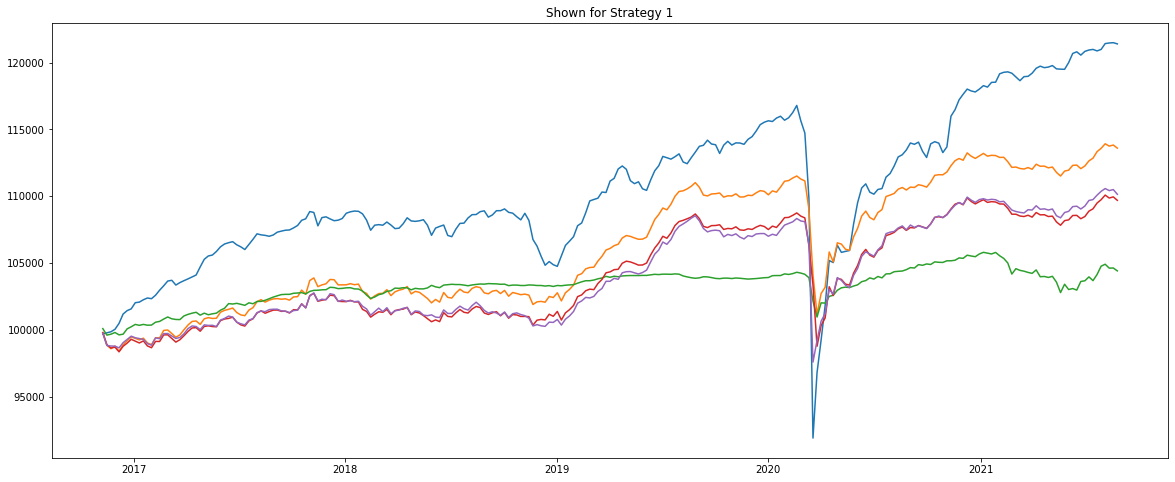

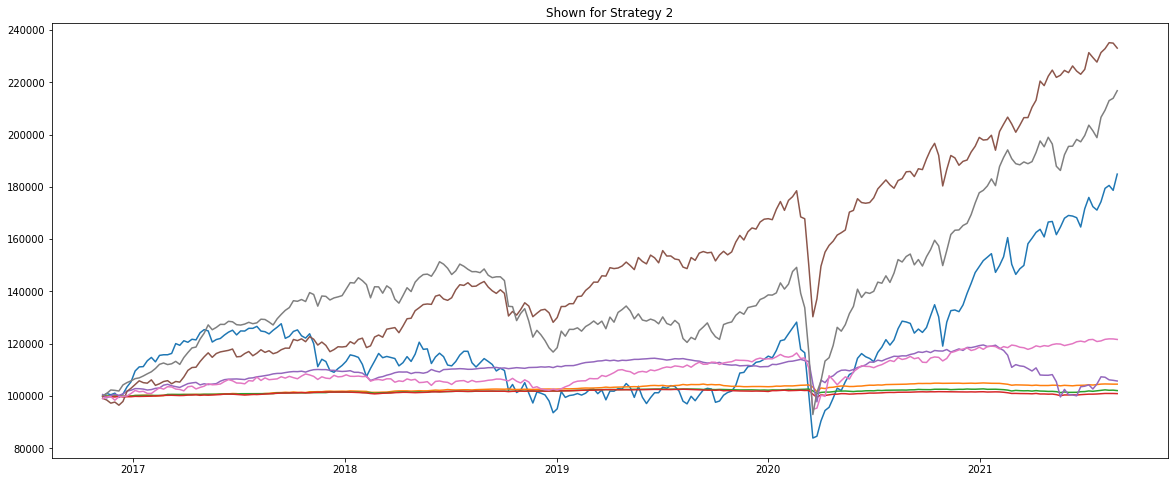

In [44]:
plt.figure(figsize=(20, 8))

for asset in top_5_test.columns:
    
    values = [100000+(100000*top_5_test[asset][0])] #begynne på 0-indeks i asseten
    
    for i in range(len(top_5_test.index)-1):
        values.append(values[i]+(top_5_test[asset][i+1]*values[i])) #går fra indeks 1 til 502 i asset
    plt.plot(list(top_5_test.index), values, label=asset)    

plt.title("Shown for Strategy 1")
plt.show()


plt.figure(figsize=(20, 8))

for asset in MST_list_test.columns:
    
    values = [100000+(100000*MST_list_test[asset][0])] #begynne på 0-indeks i asseten
    
    for i in range(len(top_5_test.index)-1):
        values.append(values[i]+(MST_list_test[asset][i+1]*values[i])) #går fra indeks 1 til 502 i asset
    plt.plot(list(MST_list_test.index), values, label=asset)    

plt.title("Shown for Strategy 2")
plt.show()





## Hierarchical clustering

### Strategy 3

Continue now with the top 200 assets with the highest Sharpe Ratios for the training set.

**Q12: Run the Hierarchical Clustering method on this set to make three clusters.**


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, fcluster, complete


# FUNCTION TO CREATE DENDOGRAM
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


# FUNCTION TO CLUSTER DATA
def Cluster(data, nClusters, dendogram):
    corr = data.corr(method="spearman")     # calculate the correlation
    distance_corr = 1-corr                  # distance based on correlation

    # Person corr distance matrix
    con_distance_corr = squareform(distance_corr)   # condence the distance matrix to be able to fit the hierarcal clustering
    complete_corr = complete(con_distance_corr)     # apply hierarchical clustering using the single distance measure
    
    if dendogram == True:
        # draw the dendogram
        plt.figure(figsize=(25, 10))
        fancy_dendrogram(
            complete_corr,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,
            color_threshold = 0.7,# font size for the x axis labels
            labels = distance_corr.index,
        #   max_d=0.35,
            annotate_above=10
        )
        plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Spearman Correlation Distance Mearsure', fontsize = 16)
        plt.xlabel('Assets', fontsize = 16)
        plt.ylabel('Distance', fontsize = 16)
        plt.show()
    
    # And now we want to save the clustering into a dataframe.
    # Create the dataframe
    cluster_df = pd.DataFrame(index=distance_corr.index)

    # Save the Complete_Corr clustering into the dataframe with 8 clusters
    cluster_df["Complete_Corr"] = fcluster(complete_corr, nClusters, criterion="maxclust")

    # Column for plotting
    for index in cluster_df.index:
        cluster_df.loc[index,"Cluster"]="Cluster "+str(cluster_df.loc[index, "Complete_Corr"])
    
    return cluster_df
 

In [46]:
# METHOD TO RUN MST METHOD AND PRINT RESULTS
def clustering(self, nClusters, nAssets, plot):
    # CLUSTER DATA
    clusters = Cluster(self.trainDataset, nClusters=nClusters, dendogram=False)

    # SELECT ASSETS
    self.subsetCLUST, self.subsetCLUST_df = pickCluster(data=self.trainDataset,
                                                        stat=self.dataPlot,
                                                        ML=clusters,
                                                        nAssets=nAssets)  # Number of assets selected from each cluster

    # PLOTTING DATA
    if plot:
        fig = self.plot_dots(start=self.start, end=self.endTrainDate, ML="Clustering", MLsubset=clusters)
        return fig


**Q13: Pick the asset with the highest Sharpe ratio from the two smaller clusters.**


**Q14: Run the Minimum Spanning Three method on the biggest cluster a number of times until you are left with 3-4 assets only.**


**Q15: Calculate the covariance matrix for these assets now and compare with the covariance matrix from strategy 1 and 2.**


**Q16: Make an equal weight portfolio of these assets and test their performance on your testing data now.**

Compare the performance of the two strategies:

**Q17: Calculate average return, std for the two strategies and compare.** 



**Q18: Calculate and compare the Sharpe ratio for the two strategies.** 

**Q19: Calculate and compare maximum drawdown for the two strategies.**

## Extra questions

The starting point for these questions are the 4-5 assets that you have picked for your portfolios in strategy 2 and 3. So in total you should perform the following statistical analysis for each of these 8-10 assets.

**Q20: Draw histograms of returns for each of the assets.**


In [47]:
subsetMST_df5

,Fundamental Invest Stock Pick,HP Invest Danske Obligationer Akk KL W,Danske Obligationer Absolut - Lav Risiko,Jyske Invest Korte Obligationer KL,Formuepleje Fokus,BLS Invest Danske Aktier KL,Jyske Invest High Yield Corp Bond CL,T. Rowe Price Eurp Smlr Cm Eq Q EUR
2012-01-11 00:00:00+00:00,0.032436,-0.000185,0.000000,0.001948,-0.001552,0.040005,0.005917,-0.000192
2012-01-18 00:00:00+00:00,0.048908,-0.001019,0.000000,-0.001433,-0.006993,0.025952,0.009519,-0.000002
2012-01-25 00:00:00+00:00,-0.010940,0.001206,0.000000,-0.001025,0.002347,0.005700,0.011319,-0.000201
2012-02-01 00:00:00+00:00,0.027277,0.000185,0.001872,0.003078,0.003903,0.015756,0.015219,0.074180
2012-02-08 00:00:00+00:00,0.014844,0.000556,0.000000,-0.001023,0.000000,0.032036,0.011017,-0.000163
...,...,...,...,...,...,...,...,...
2016-10-05 00:00:00+00:00,0.002630,0.000850,0.000298,-0.001651,-0.003988,-0.007248,0.000933,0.009479
2016-10-12 00:00:00+00:00,-0.010453,-0.000170,0.000000,0.001757,-0.003743,-0.022774,0.009197,-0.020588
2016-10-19 00:00:00+00:00,0.014174,-0.000340,0.000000,0.001238,0.000000,0.006707,-0.012617,0.009962
2016-10-26 00:00:00+00:00,-0.005492,-0.000170,0.000000,-0.000103,-0.001398,0.006434,0.012299,-0.012843


In [49]:
subsetMST_df5['Fundamental Invest Stock Pick']

2012-01-11 00:00:00+00:00    0.032436
2012-01-18 00:00:00+00:00    0.048908
2012-01-25 00:00:00+00:00   -0.010940
2012-02-01 00:00:00+00:00    0.027277
2012-02-08 00:00:00+00:00    0.014844
                               ...   
2016-10-05 00:00:00+00:00    0.002630
2016-10-12 00:00:00+00:00   -0.010453
2016-10-19 00:00:00+00:00    0.014174
2016-10-26 00:00:00+00:00   -0.005492
2016-11-02 00:00:00+00:00   -0.033780
Name: Fundamental Invest Stock Pick, Length: 252, dtype: float64

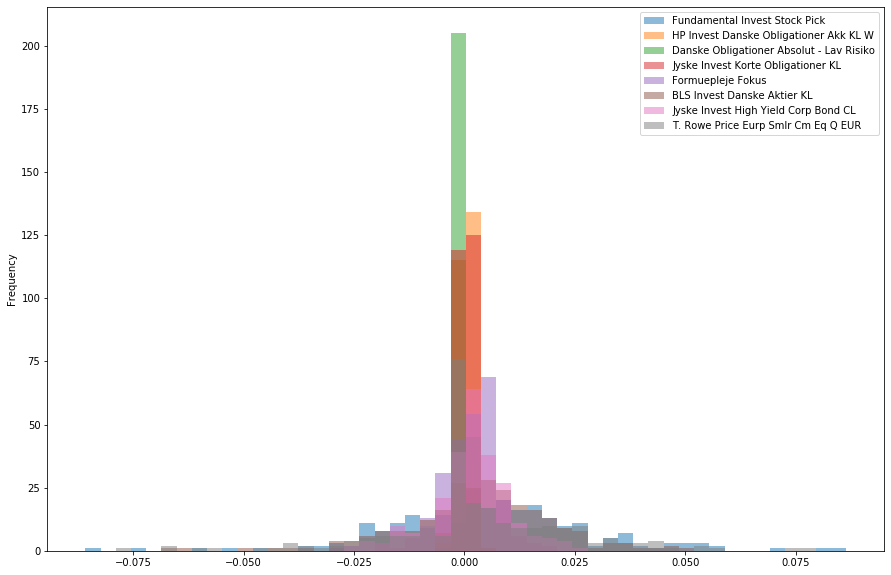

In [73]:
subsetMST_df5.plot.hist(alpha=0.5, figsize=(15,10), bins=50)

**Q21: Draw density function of returns for each of the assets.**


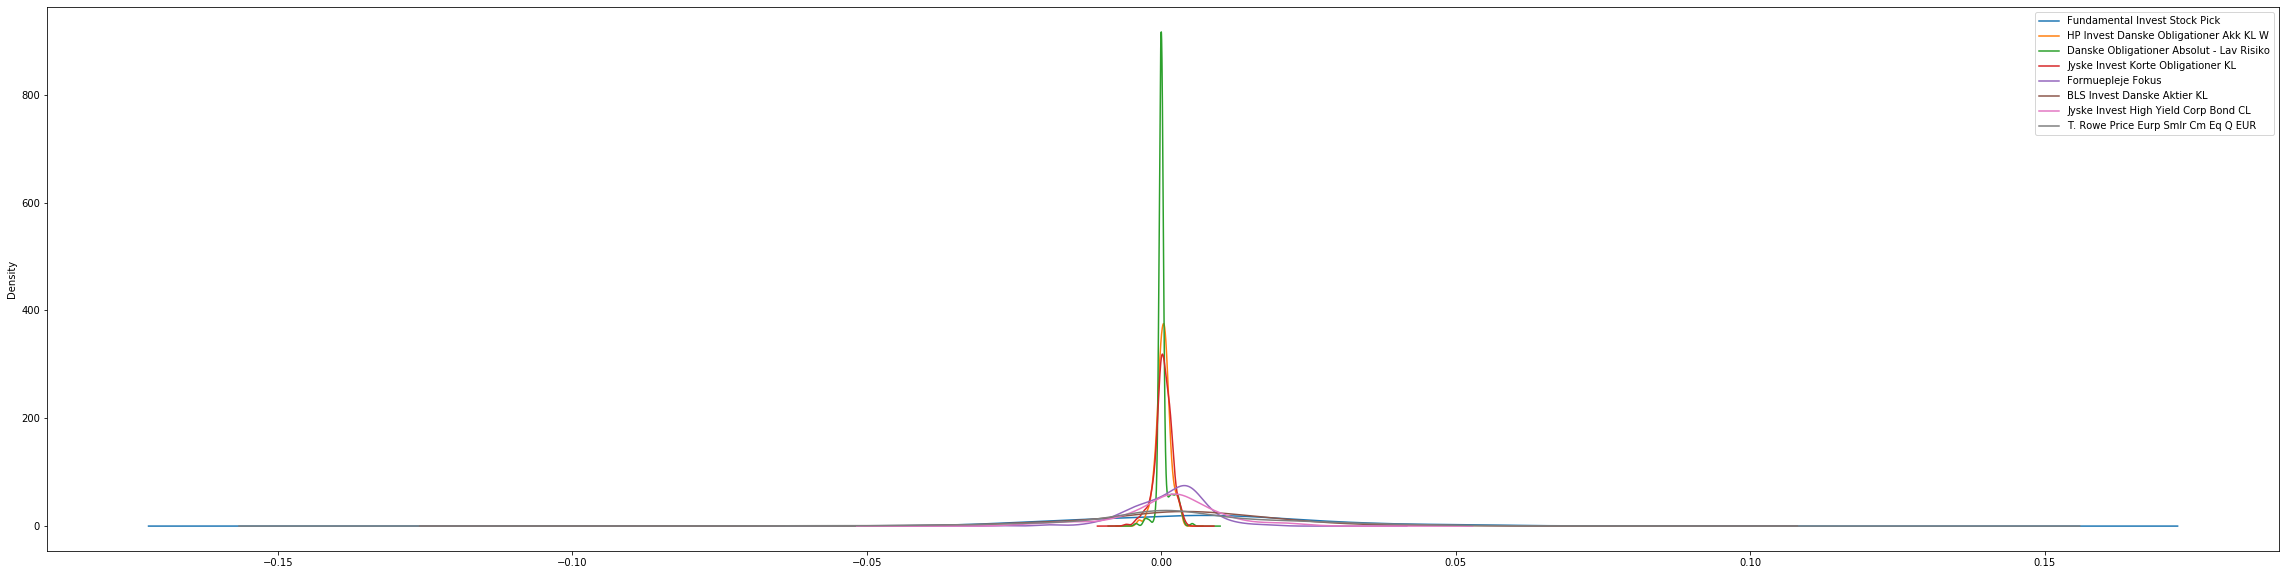

In [71]:
subsetMST_df5.plot.kde(figsize=(40,10))

**Q22: Draw QQ-Plots of returns for each of the assets.**


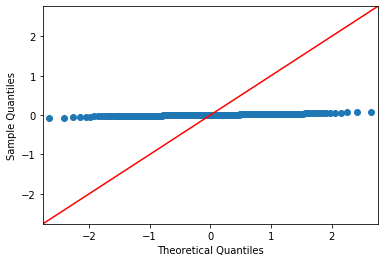

In [75]:
import numpy as np
import statsmodels.api as sm
import pylab

#test = np.random.normal(0,1, 1000)

sm.qqplot(subsetMST_df5['Fundamental Invest Stock Pick'], line='45')
pylab.show()

**Q23: Perform a Jarque-Bera test for normality of return distributions for each of the assets. Q24: Measure and report skewness of returns for each of the assets.**


**Q25: Measure and report kurtosis of returns for each of the assets.**


**Q26: For each of the assets, decide and report whether you can accept the return as being normally distributed.**